# Uber Data Analysis Project

In [27]:
import pandas
import seaborn


# Load CSV file into memory

In [26]:
data = pandas.read_csv('Desktop/uber-raw-data-apr14.csv')

In [4]:
data.tail()



,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [5]:
dt = '4/30/2014 23:22:00'
print(dt)
d,t = dt.split()
print(d,t,sep='\n')
month,date,year = d.split('/')
print(date,month,year,sep='\n')

4/30/2014 23:22:00
4/30/2014
23:22:00
30
4
2014


# Convert datetime and add some useful columns

In [6]:
date_time = '4/30/2014 23:22:00'

In [7]:
date_time= pandas.to_datetime(date_time)

In [8]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [9]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [10]:
def get_dom(date_time):
    return date_time.day

data['dom']=data['Date/Time'].map(get_dom)

In [11]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [12]:
def get_weekday(date_time):
    return date_time.weekday()
data['Weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(date_time):
    return date_time.hour

data['Hour'] = data['Date/Time'].map(get_hour)


In [13]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,Weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis

# Datewise Analysis

Text(0.5,1,'Frequency by date of month -- uber -- Apr 2014')

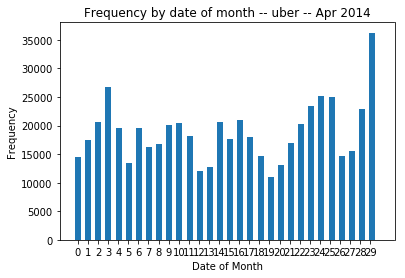

In [14]:
plt.hist(data.dom,bins=30,width=.6,range=(.7,30.9))
;
xticks(range(1,31), data.dom.index)
plt.xlabel('Date of Month')
plt.ylabel ('Frequency')
plt.title ('Frequency by date of month -- uber -- Apr 2014')

In [15]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

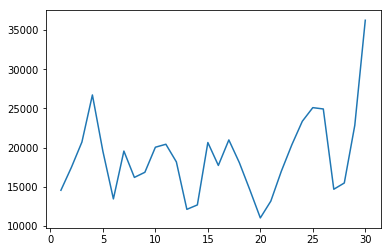

In [16]:
plot(by_date)

In [17]:
by_date_sorted=(by_date.sort_values())
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

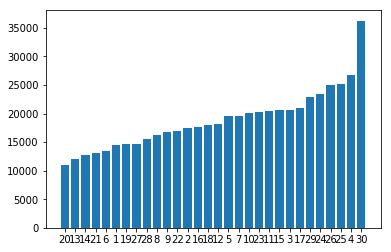

In [18]:
plt.bar(range(1,31),by_date_sorted)

xticks(range(1,31), by_date_sorted.index)
;

# Analysis according to hour

Text(0,0.5,'Frequency')

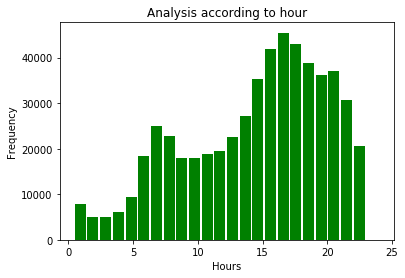

In [19]:
plt.hist(data.Hour,bins=24,range=(.5,24),width=.85 , color='g')
plt.title('Analysis according to hour')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Analysis according to weekday

''

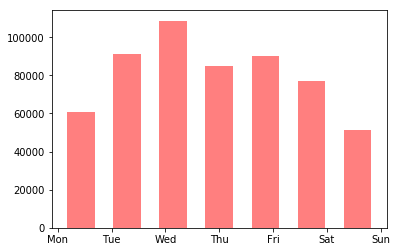

In [20]:
plt.hist(data.Weekday,bins=7,range=(0,6),rwidth=.6,color='r',alpha=.5)

xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
;

# Cross Analysis (hour,weekday)

In [21]:
cross = data.groupby('Weekday Hour'.split()).apply(count_rows).unstack()

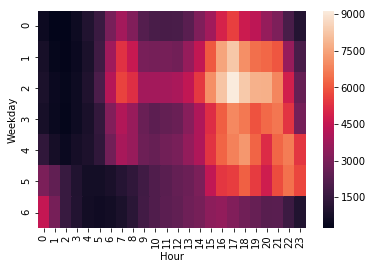

In [22]:
seaborn.heatmap(cross)

''

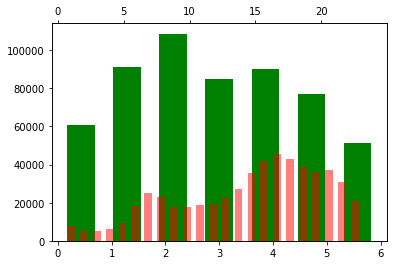

In [23]:
hist(data['Weekday'],bins=7,range=(0,6),rwidth=.6,color='green')

twiny()
hist(data['Hour'],bins=24,range=(0.5,24),rwidth=.6,color='red',alpha=.5)
;

# Analysis by latitude and longitude

''

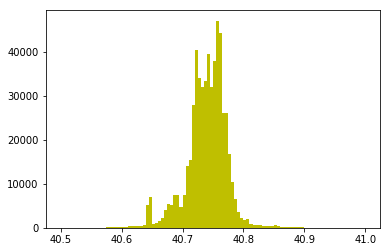

In [32]:
plt.hist(data['Lat'],bins=100,range=(40.5,41),color='y')
;

''

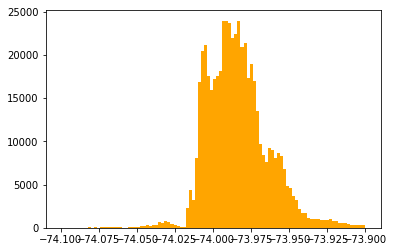

In [25]:
hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='orange')
;

''

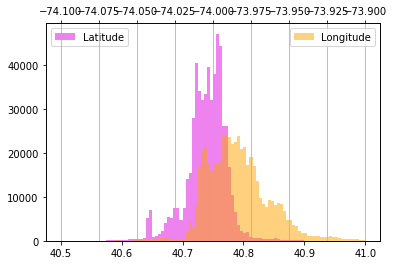

In [26]:
hist(data['Lat'],bins=100,range=(40.5,41),color='violet',label='Latitude')
legend(loc='upper left')
twiny()
hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='orange',alpha=.5,label='Longitude')
grid()
legend(loc='upper right')
;

(0, 100)

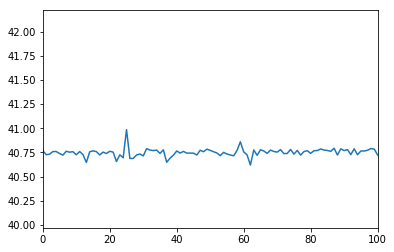

In [27]:
plot(data['Lat'])
xlim(0,100)

# Plotting Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

In [3]:
uber_data = pd.read_csv('Desktop/uber-raw-data-apr14.csv')
uber_data.head()
uber_data.info()
uber_data.describe()
uber_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [4]:
x=[(i) for i in uber_data['Lat']]
y=[(j) for j in uber_data['Lon']]

In [6]:
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 

In [10]:
import matplotlib

Text(0.5,1,'Longitude vs Latitude Regression model')

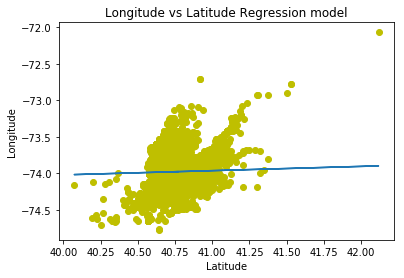

In [20]:
plt.plot(x,y, 'yo', x, fit_fn(x))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Longitude vs Latitude Regression model')